# Task: Customer segmentation system Project  


## **Read the csv dataset as a pandas dataframe.**

In [1]:
from google.colab import files
uploaded_files = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('Mall_Customers.csv')

## **Data Understanding**

In [4]:
pd.concat([data.head(),data.tail()])      # Show top 5 & bottom 5 rows

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
data.sample(10)      # Look at the random 10 records in the apps dataframe

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
126,127,Male,43,71,35
127,128,Male,40,71,95
131,132,Male,39,71,75
23,24,Male,31,25,73
25,26,Male,29,28,82
98,99,Male,48,61,42
10,11,Male,67,19,14
92,93,Male,48,60,49
51,52,Male,33,42,60
159,160,Female,30,78,73


In [6]:
data.columns     # Series of dataset columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
data.describe()   #Statistical information of dataset

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# This custom user defined function will give the datatype,count of null & non null values, count of Unique values present in dataset in the form of dataframe

def datainfo():
  df_temp = pd.DataFrame(index=data.columns)
  df_temp["Null value"] = data.isnull().sum()
  df_temp["% of the Null value"] = data.isnull().mean()*100
  df_temp["Not Null value"] = data.count()
  df_temp["Unique count"] = data.nunique()
  df_temp["Datatype"] = data.dtypes
  
  return df_temp

datainfo()

,Null value,% of the Null value,Not Null value,Unique count,Datatype
CustomerID,0,0.0,200,200,int64
Gender,0,0.0,200,2,object
Age,0,0.0,200,51,int64
Annual Income (k$),0,0.0,200,64,int64
Spending Score (1-100),0,0.0,200,84,int64


In [10]:
#Check if the duplicate values are present in the dataset.
data[data.duplicated()]      # No duplicate value present in the dataset.

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

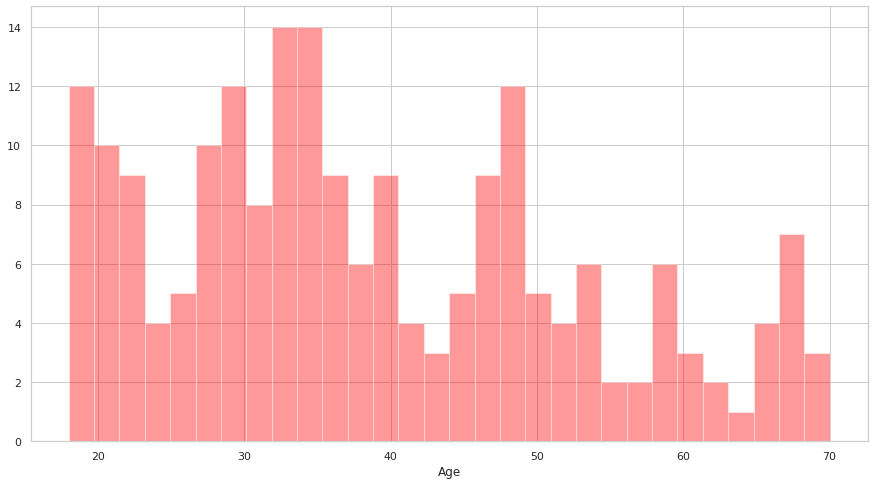

In [25]:
# set the background style of the plot
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.distplot(data['Age'], kde = False, color ='red', bins = 30)

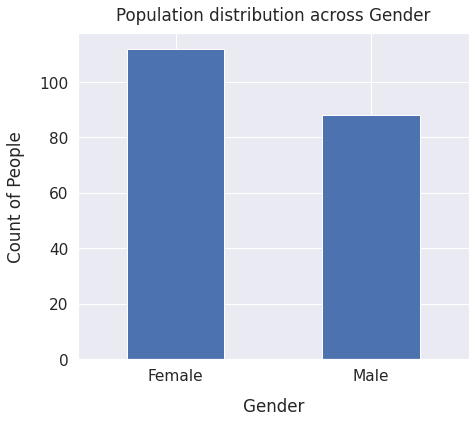

In [26]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.4)
data['Gender'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Population distribution across Gender", y=1.02);



In [13]:
X = data.iloc[:,[3,4]].values

In [14]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [15]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

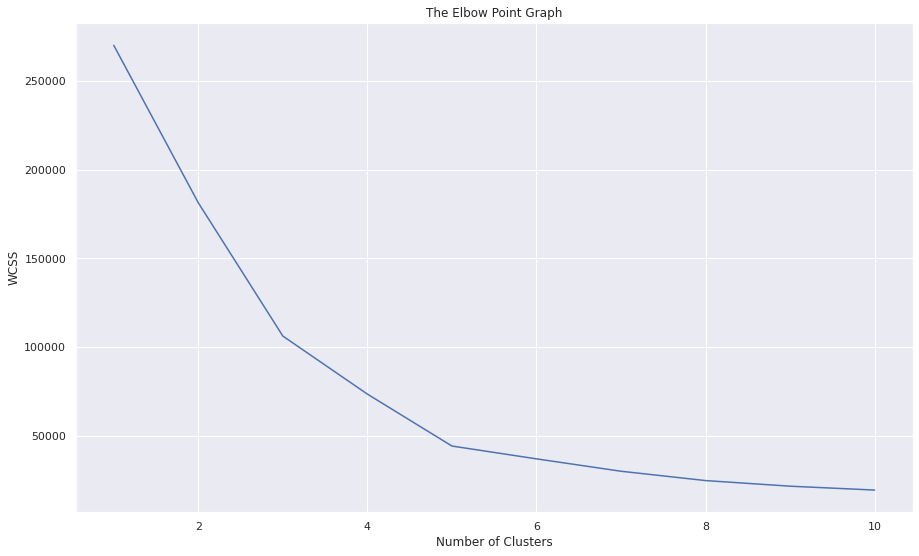

In [28]:
# plot an elbow graph

plt.figure(figsize=(15,9))
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


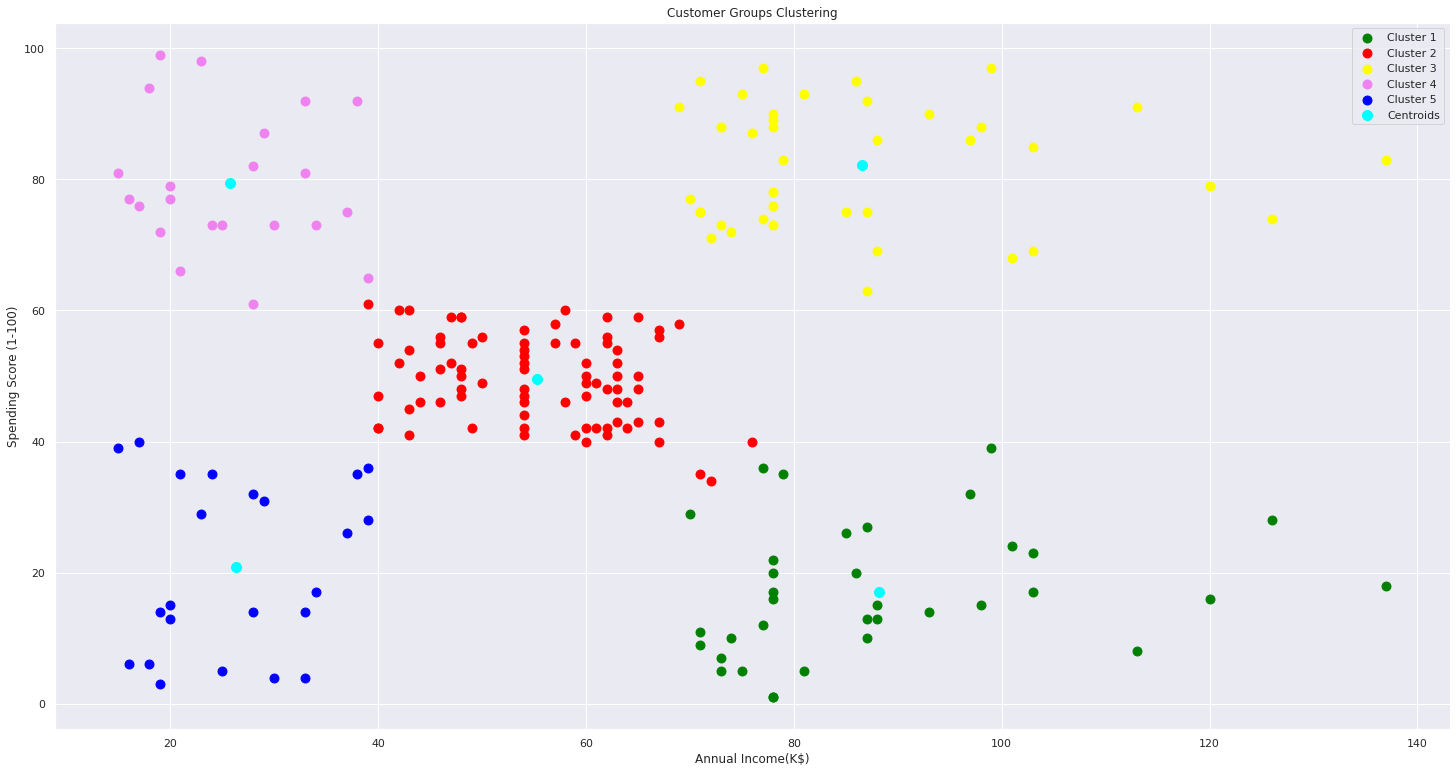

In [35]:
# plot graph of the clusters along with their Centroids

plt.figure(figsize=(25,13))
plt.scatter(X[Y==0,0], X[Y==0,1], s=80, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=80, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=80, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=80, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=80, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups Clustering')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import silhouette_score
silhouette_score_kmeans = silhouette_score(X,Y)

print(silhouette_score_kmeans)

0.553931997444648
